#### Ejemplo AF 

In [80]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.DataFrame([[3,6,5],[7,3,3],[10,9,8],[3,9,7],[10,6,5]],columns=['fin','mkt','pol'])

In [82]:
df.corr()

,fin,mkt,pol
fin,1.000000,-0.051120,0.080449
mkt,-0.051120,1.000000,0.981023
pol,0.080449,0.981023,1.000000


In [83]:
df.describe()

,fin,mkt,pol
count,5.000000,5.00000,5.000000
mean,6.600000,6.60000,5.600000
std,3.507136,2.50998,1.949359
min,3.000000,3.00000,3.000000
25%,3.000000,6.00000,5.000000
50%,7.000000,6.00000,5.000000
75%,10.000000,9.00000,7.000000
max,10.000000,9.00000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ab8acecf8>,
      dtype=object)

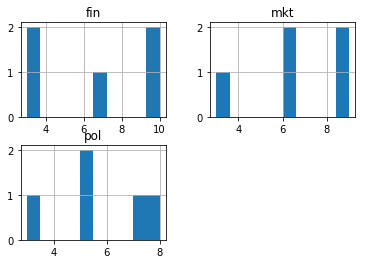

In [84]:
df.hist()

In [85]:
df.shape

(5, 3)

In [86]:
sc = StandardScaler()
sc.fit(df)
Xs = pd.DataFrame(sc.transform(df),columns=df.columns)

/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
Xs.describe()

,fin,mkt,pol
count,5.000000e+00,5.000000e+00,5.000000e+00
mean,8.881784e-17,9.992007e-17,1.554312e-16
std,1.118034e+00,1.118034e+00,1.118034e+00
min,-1.147638e+00,-1.603567e+00,-1.491202e+00
25%,-1.147638e+00,-2.672612e-01,-3.441236e-01
50%,1.275153e-01,-2.672612e-01,-3.441236e-01
75%,1.083880e+00,1.069045e+00,8.029551e-01
max,1.083880e+00,1.069045e+00,1.376494e+00


In [88]:
pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%i for i in range(1,4)])

In [89]:
Xp

,p1,p2,p3
0,0.456625,1.138253,-0.052885
1,2.185053,-0.180804,-0.065014
2,-1.752087,-1.062528,-0.116694
3,-1.298862,1.188043,0.078602
4,0.409271,-1.082964,0.155991


In [90]:
Xp.corr()

,p1,p2,p3
p1,1.000000e+00,1.099636e-16,-1.773983e-15
p2,1.099636e-16,1.000000e+00,2.186224e-16
p3,-1.773983e-15,2.186224e-16,1.000000e+00


In [91]:
pca.explained_variance_ratio_

array([0.66048771, 0.33610211, 0.00341018])

In [92]:
np.cumsum(pca.explained_variance_ratio_)

array([0.66048771, 0.99658982, 1.        ])

In [93]:
fa =FactorAnalyzer()

In [94]:
fa.analyze(Xs,2,rotation='varimax')

In [95]:
fa.loadings

,Factor1,Factor2
fin,0.012593,0.782041
mkt,0.994216,-0.081354
pol,0.993752,0.086845


In [96]:
from sklearn.datasets import load_iris

In [97]:
data = load_iris()

X,y = pd.DataFrame(data.data,\
                   columns=data.feature_names),\
pd.Series(data.target).replace(range(3),data.target_names)

In [99]:
y.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
dtype: float64

In [100]:
sc.fit(X)
Xs=pd.DataFrame(sc.transform(X),columns=X.columns)

pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%i for i in range(1,5)])

In [102]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

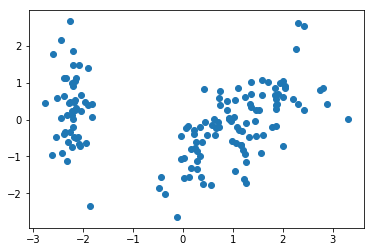

In [103]:
plt.scatter(Xp['p1'],Xp['p2'])

In [104]:
Xp = Xp.merge(y.to_frame(),left_index=True,right_index=True)

In [105]:
Xp.rename(columns={0:'species'},inplace=True)

In [106]:
Xp.head()

,p1,p2,p3,p4,species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


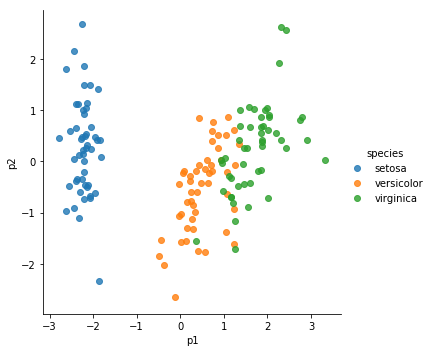

In [109]:
sns.lmplot('p1','p2',Xp,hue='species',fit_reg=False)

In [119]:
from sklearn.datasets import load_breast_cancer

In [123]:
data = load_breast_cancer()

X,y = pd.DataFrame(data.data,\
                   columns=data.feature_names),\
pd.Series(data.target)

In [126]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [129]:
sc.fit(X)
Xs=pd.DataFrame(sc.transform(X),columns=X.columns)

pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(len(Xs.columns))])

In [131]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [132]:
fa=FactorAnalyzer()

In [135]:
fa.analyze(Xs,2,rotation='varimax')

In [136]:
fa.loadings

,Factor1,Factor2
mean radius,0.975836,-0.067954
mean texture,0.365938,0.080622
mean perimeter,0.979662,-0.012349
mean area,0.979915,-0.059275
mean smoothness,0.217401,0.613751
mean compactness,0.554821,0.774648
mean concavity,0.728702,0.620901
mean concave points,0.854743,0.427395
mean symmetry,0.199486,0.611238
mean fractal dimension,-0.248408,0.869792


In [ ]:
fa.|